In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplt
import seaborn as sns

In [2]:
matrix_cmp_21 = pd.read_csv("../data/cmp_sourmash/ehux-mmetsp_k21.cmp.csv")
matrix_cmp_33 = pd.read_csv("../data/cmp_sourmash/ehux-mmetsp_k33.cmp.csv")
matrix_cmp_51 = pd.read_csv("../data/cmp_sourmash/ehux-mmetsp_k51.cmp.csv")

In [3]:
print(len(matrix_cmp_21.columns))
print(len(matrix_cmp_33.columns))
print(len(matrix_cmp_51.columns))
matrix_cmp_51

37
37
37


,data/mmetsp_ehux/MMETSP1152.fasta,data/mmetsp_ehux/MMETSP1155.fasta,data/mmetsp_ehux/ehuxreference.fasta,data/mmetsp_ehux/MMETSP1157.fasta,data/mmetsp_ehux/MMETSP1152.fasta.1,data/mmetsp_ehux/MMETSP1155.fasta.1,data/mmetsp_ehux/ehuxreference.fasta.1,data/mmetsp_ehux/MMETSP1157.fasta.1,data/backtransseq/MMETSP1152.fasta,data/backtransseq/MMETSP0994.fasta,...,data/mmetsp_ehux/MMETSP0997.fasta,data/mmetsp_ehux/MMETSP1154.fasta,data/mmetsp_ehux/MMETSP1153.fasta,data/mmetsp_ehux/MMETSP0995.fasta,data/mmetsp_ehux/MMETSP1008.fasta,data/mmetsp_ehux/ehuxreference.fasta.2,data/mmetsp_ehux/MMETSP1006.fasta,data/mmetsp_ehux/MMETSP1007.fasta,data/mmetsp_ehux/MMETSP1150.fasta,data/mmetsp_ehux/MMETSP1157.fasta.2
0,1.000000,0.412411,0.069039,0.385601,1.000000,0.412411,0.069039,0.385601,0.683254,0.241352,...,0.269879,0.391539,0.590398,0.267716,0.239580,0.069039,0.209710,0.193837,0.549851,0.385601
1,0.412411,1.000000,0.084655,0.560705,0.412411,1.000000,0.084655,0.560705,0.357157,0.202589,...,0.236433,0.543313,0.432718,0.243165,0.250296,0.084655,0.223341,0.211769,0.409048,0.560705
2,0.069039,0.084655,1.000000,0.111756,0.069039,0.084655,1.000000,0.111756,0.055241,0.041080,...,0.053778,0.056845,0.068112,0.047422,0.039504,1.000000,0.039273,0.032772,0.066085,0.111756
3,0.385601,0.560705,0.111756,1.000000,0.385601,0.560705,0.111756,1.000000,0.338201,0.189360,...,0.224298,0.527455,0.409079,0.216891,0.241505,0.111756,0.209671,0.192930,0.383655,1.000000
4,1.000000,0.412411,0.069039,0.385601,1.000000,0.412411,0.069039,0.385601,0.683254,0.241352,...,0.269879,0.391539,0.590398,0.267716,0.239580,0.069039,0.209710,0.193837,0.549851,0.385601
5,0.412411,1.000000,0.084655,0.560705,0.412411,1.000000,0.084655,0.560705,0.357157,0.202589,...,0.236433,0.543313,0.432718,0.243165,0.250296,0.084655,0.223341,0.211769,0.409048,0.560705
6,0.069039,0.084655,1.000000,0.111756,0.069039,0.084655,1.000000,0.111756,0.055241,0.041080,...,0.053778,0.056845,0.068112,0.047422,0.039504,1.000000,0.039273,0.032772,0.066085,0.111756
7,0.385601,0.560705,0.111756,1.000000,0.385601,0.560705,0.111756,1.000000,0.338201,0.189360,...,0.224298,0.527455,0.409079,0.216891,0.241505,0.111756,0.209671,0.192930,0.383655,1.000000
8,0.683254,0.357157,0.055241,0.338201,0.683254,0.357157,0.055241,0.338201,1.000000,0.245908,...,0.278129,0.343897,0.495318,0.270812,0.245671,0.055241,0.208456,0.195354,0.509073,0.338201
9,0.241352,0.202589,0.041080,0.189360,0.241352,0.202589,0.041080,0.189360,0.245908,1.000000,...,0.459734,0.200254,0.234449,0.505022,0.264588,0.041080,0.218113,0.213582,0.241455,0.189360


In [4]:
matrix_cmp_21 = pd.read_csv("../data/cmp_sourmash/ehux-mmetsp_k21.cmp.csv")
matrix_cmp_33 = pd.read_csv("../data/cmp_sourmash/ehux-mmetsp_k33.cmp.csv")
matrix_cmp_51 = pd.read_csv("../data/cmp_sourmash/ehux-mmetsp_k51.cmp.csv")

newnames_51 = []
newnames_21 = []
newnames_31 = []
for r in range(len(matrix_cmp_51.columns)):
    curr = matrix_cmp_51.columns[r].split("/")
    
    if (len(curr) > 2) & (curr[2] == "trinityfiles"):
        curr = curr[len(curr)-1].split("_")[0] + "-trinity"
    elif (len(curr) > 1) & (curr[1] == "backtransseq"):
        curr = curr[len(curr)-1].split("_")[0] + "-backtrans"
    else:
        curr = curr[len(curr)-1].split("_")[0]
    newnames_51.append(curr)
    
    
for r in range(len(matrix_cmp_33.columns)):
    curr = matrix_cmp_33.columns[r].split("/")
    
    if (len(curr) > 2) & (curr[2] == "trinityfiles"):
        curr = curr[len(curr)-1].split("_")[0] + "-trinity"
    elif (len(curr) > 1) & (curr[1] == "backtransseq"):
        curr = curr[len(curr)-1].split("_")[0] + "-backtrans"
    else:
        curr = curr[len(curr)-1].split("_")[0]
    newnames_31.append(curr)
    
    
for r in range(len(matrix_cmp_21.columns)):
    curr = matrix_cmp_21.columns[r].split("/")
    
    if (len(curr) > 2) & (curr[2] == "trinityfiles"):
        curr = curr[len(curr)-1].split("_")[0] + "-trinity"
    elif (len(curr) > 1) & (curr[1] == "backtransseq"):
        curr = curr[len(curr)-1].split("_")[0] + "-backtrans"
    else:
        curr = curr[len(curr)-1].split("_")[0]
    newnames_21.append(curr)

matrix_cmp_21.columns = newnames_21
matrix_cmp_33.columns = newnames_31
matrix_cmp_51.columns = newnames_51
matrix_cmp_33
indices = [("MMETSP" in curr) | ("ehux" in curr) for curr in matrix_cmp_21.columns]
matrix_cmp_21 = matrix_cmp_21.iloc[np.where(indices)[0],np.where(indices)[0]]

indices = [("MMETSP" in curr) | ("ehux" in curr) for curr in matrix_cmp_33.columns]
matrix_cmp_33 = matrix_cmp_33.iloc[indices,indices]
print(matrix_cmp_33)

indices = [("MMETSP" in curr) | ("ehux" in curr) for curr in matrix_cmp_51.columns]
matrix_cmp_51 = matrix_cmp_51.iloc[indices,indices]

    MMETSP1152.fasta  MMETSP1155.fasta  ehuxreference.fasta  MMETSP1157.fasta  \
0           1.000000          0.481270             0.095946          0.451941   
1           0.481270          1.000000             0.089415          0.601046   
2           0.095946          0.089415             1.000000          0.108817   
3           0.451941          0.601046             0.108817          1.000000   
4           1.000000          0.481270             0.095946          0.451941   
5           0.481270          1.000000             0.089415          0.601046   
6           0.095946          0.089415             1.000000          0.108817   
7           0.451941          0.601046             0.108817          1.000000   
8           0.638055          0.407011             0.070930          0.372153   
9           0.235917          0.232525             0.032027          0.207450   
10          0.388968          0.492637             0.066414          0.461302   
11          0.408885        

In [5]:
matrix_cmp_21_prot = pd.read_csv("../data/cmp_sourmash/ehux-mmetsp_k21_protein.cmp.csv")
matrix_cmp_33_prot = pd.read_csv("../data/cmp_sourmash/ehux-mmetsp_k33_protein.cmp.csv")
matrix_cmp_51_prot = pd.read_csv("../data/cmp_sourmash/ehux-mmetsp_k51_protein.cmp.csv")

In [6]:
newnames_51 = []
newnames_21 = []
newnames_33 = []
for r in range(len(matrix_cmp_51_prot.columns)):
    curr = matrix_cmp_51_prot.columns[r].split("/")
    if (len(curr) > 2) & (curr[2] == "trinityfiles"):
        curr = curr[len(curr)-1].split("_")[0] + "-trinity"
    elif (len(curr) > 1) & (curr[1] == "backtransseq"):
        curr = curr[len(curr)-1].split("_")[0] + "-backtrans"
    elif (len(curr) > 1) & (curr[1] == "transdecoder"):
        curr = curr[len(curr)-1].split("_")[0].split(".fasta.transdecoder.pep")[0] + "-transdecode"
    else:
        curr = curr[len(curr)-1].split("_")[0]
    newnames_51.append(curr)
    
    
for r in range(len(matrix_cmp_33_prot.columns)):
    curr = matrix_cmp_33_prot.columns[r].split("/")
    
    if (len(curr) > 2) & (curr[2] == "trinityfiles"):
        curr = curr[len(curr)-1].split("_")[0] + "-trinity"
    elif (len(curr) > 1) & (curr[1] == "backtransseq"):
        curr = curr[len(curr)-1].split("_")[0] + "-backtrans"
    elif (len(curr) > 1) & (curr[1] == "transdecoder"):
        curr = curr[len(curr)-1].split("_")[0].split(".fasta.transdecoder.pep")[0] + "-transdecode"
    else:
        curr = curr[len(curr)-1].split("_")[0]
    newnames_33.append(curr)
    
    
for r in range(len(matrix_cmp_21_prot.columns)):
    curr = matrix_cmp_21_prot.columns[r].split("/")
    
    if (len(curr) > 2) & (curr[2] == "trinityfiles"):
        curr = curr[len(curr)-1].split("_")[0] + "-trinity"
    elif (len(curr) > 1) & (curr[1] == "backtransseq"):
        curr = curr[len(curr)-1].split("_")[0] + "-backtrans"
    elif (len(curr) > 1) & (curr[1] == "transdecoder"):
        curr = curr[len(curr)-1].split("_")[0].split(".fasta.transdecoder.pep")[0] + "-transdecode"
    else:
        curr = curr[len(curr)-1].split("_")[0]
    newnames_21.append(curr)

matrix_cmp_21_prot.columns = newnames_21
matrix_cmp_33_prot.columns = newnames_33
matrix_cmp_51_prot.columns = newnames_51
matrix_cmp_33_prot

,MMETSP0997-transdecode,MMETSP1152-transdecode,MMETSP1153-transdecode,MMETSP1151-transdecode,MMETSP1154-transdecode,MMETSP0994-transdecode,MMETSP1155-transdecode,MMETSP0996-transdecode,MMETSP1157-transdecode,MMETSP0995-transdecode,MMETSP1150-transdecode,MMETSP1156-transdecode
0,1.000000,0.976223,0.973347,0.980014,0.979901,0.992355,0.982473,0.992970,0.976269,0.996369,0.973635,0.978653
1,0.976223,1.000000,0.995573,0.987342,0.994550,0.982308,0.991495,0.970787,0.996625,0.977864,0.995754,0.995898
2,0.973347,0.995573,1.000000,0.987015,0.991858,0.979829,0.988486,0.967753,0.995814,0.975033,0.997972,0.993345
3,0.980014,0.987342,0.987015,1.000000,0.986926,0.987224,0.985391,0.973658,0.987491,0.981446,0.987118,0.987412
4,0.979901,0.994550,0.991858,0.986926,1.000000,0.985288,0.995967,0.974776,0.995068,0.981531,0.992195,0.997383
5,0.992355,0.982308,0.979829,0.987224,0.985288,1.000000,0.986967,0.986024,0.982364,0.993426,0.980112,0.984373
6,0.982473,0.991495,0.988486,0.985391,0.995967,0.986967,1.000000,0.977787,0.991845,0.984023,0.988846,0.994468
7,0.992970,0.970787,0.967753,0.973658,0.974776,0.986024,0.977787,1.000000,0.970833,0.991592,0.968068,0.973387
8,0.976269,0.996625,0.995814,0.987491,0.995068,0.982364,0.991845,0.970833,1.000000,0.977950,0.996166,0.996224
9,0.996369,0.977864,0.975033,0.981446,0.981531,0.993426,0.984023,0.991592,0.977950,1.000000,0.975346,0.980301


In [7]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.multi_sparse = False

In [8]:
accnums = [int(curr.split("SRR")[1].split("-")[0]) for curr in matrix_cmp_33_prot.columns]
indices = np.argsort(accnums)

matrix_cmp_33_prot.iloc[indices,indices]#.columns

IndexError: list index out of range

In [ ]:
#sns.barplot(x=list(matrix_cmp_31.columns), y="thapsreferencecoding.fastq", data=matrix_cmp_31)
#np.shape(list(matrix_cmp_31.columns))
np.shape(list(matrix_cmp_33["thapsreferencecoding.fastq"]))
colss = matrix_cmp_33.columns
indices = np.where([("coding" not in curr) & ("reference" not in curr) for curr in colss])[0]

xvalues = list(matrix_cmp_33.columns[indices])
yvalues = list(matrix_cmp_33["thapsreferencecoding.fastq"][indices])

plt.figure(figsize=(15,4))
#g = sns.barplot(x=list(matrix_cmp_31.columns), y=list(matrix_cmp_31["thapsreferencecoding.fastq"]))
g = sns.barplot(x=xvalues, y=yvalues)
#g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')


In [ ]:
import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt

np.shape(list(matrix_cmp_33["thapsreferencecoding.fastq"]))
colss = matrix_cmp_33.columns
indices = np.where([("coding" not in curr) & ("reference" not in curr) for curr in colss])[0]

xvalues = list(matrix_cmp_33.columns[indices])
yvalues = list(matrix_cmp_33["thapsreferencecoding.fastq"][indices])

data = yvalues
bins = np.arange(13) / 1000

hist, edges = np.histogram(data, bins=bins)
plt.show()

y = np.arange(1,hist.max()+1)
x = np.arange(12) / 1000
X,Y = np.meshgrid(x,y)

Y = Y.astype(np.float)
Y[Y>hist] = np.nan
Y[X == 0] = np.nan

plt.scatter(X,Y) #, c=Y<=hist) #, cmap="Greys")

plt.show()

In [10]:
backtransindex = ["backtrans" in curr for curr in matrix_cmp_51.columns]
trinityindex = ["trinity" in curr for curr in matrix_cmp_51.columns]
refindex = ["reference" in curr for curr in matrix_cmp_51.columns]
expnum = "120"#"629"#"120"#"406"
experimentindex = [expnum in curr for curr in matrix_cmp_51.columns]
rawindex_exp = [curr for curr in range(0,len(matrix_cmp_51.columns)) \
                               if (not (backtransindex[curr] | trinityindex[curr] | refindex[curr])) & (experimentindex[curr])]
backtransindex_exp = [("backtrans" in curr) & (expnum in curr) for curr in matrix_cmp_51.columns]
trinityindex_exp = [("trinity" in curr) & (expnum in curr) for curr in matrix_cmp_51.columns]

transcriptomeindex = [curr for curr in range(0,len(matrix_cmp_51.columns)) \
                               if (not (trinityindex[curr] | refindex[curr])) & (experimentindex[curr])]

Text(0.5, 1, 'k=51')

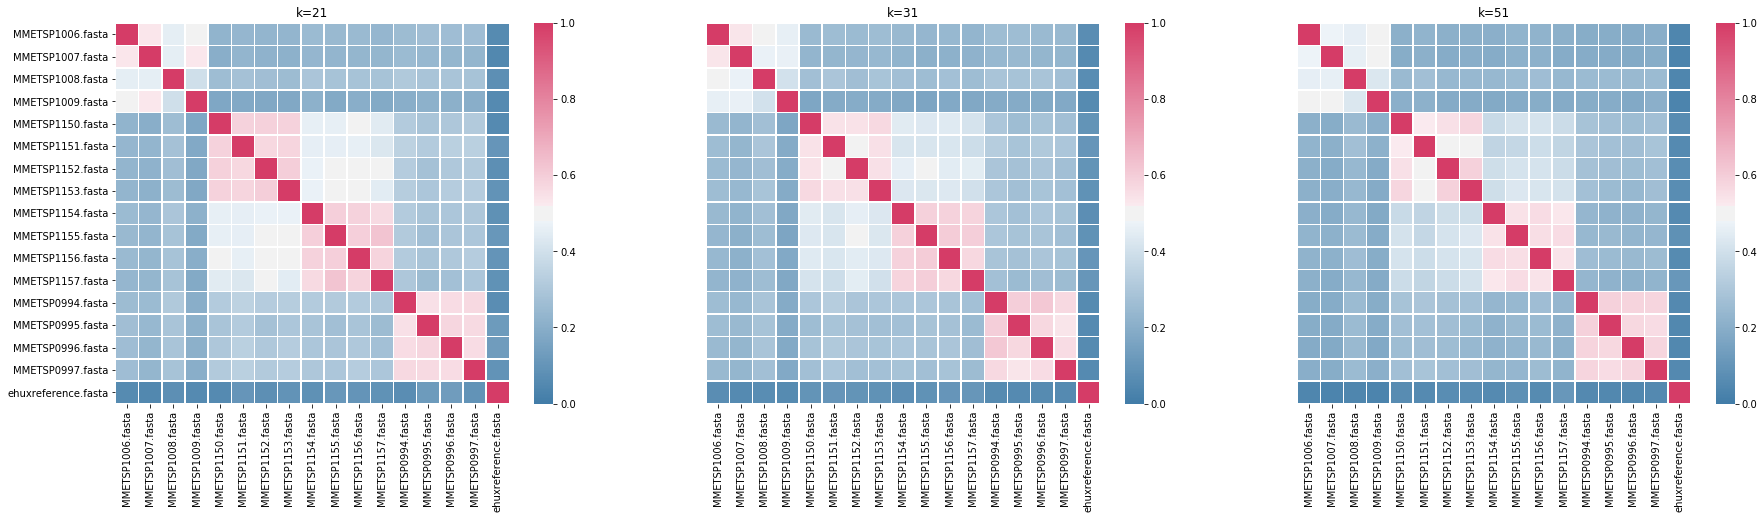

In [11]:
selectedindex = [(".2" not in curr) & (".1" not in curr) & ("backtrans" not in curr) for curr in matrix_cmp_51.columns]

matrix_cmp_21_index = matrix_cmp_21.iloc[selectedindex,selectedindex]
matrix_cmp_33_index = matrix_cmp_33.iloc[selectedindex,selectedindex]
matrix_cmp_51_index = matrix_cmp_51.iloc[selectedindex,selectedindex]
matrix_cmp_21_index.index = matrix_cmp_21_index.columns
matrix_cmp_33_index.index = matrix_cmp_33_index.columns
matrix_cmp_51_index.index = matrix_cmp_51_index.columns

accnums = [int(curr.split("MMETSP")[1].split(".")[0]) if "MMETSP" in curr else curr for curr in matrix_cmp_51_index.columns]
types_names = [curr.split("-")[len(curr.split("-"))-1] for curr in matrix_cmp_51_index.columns]
types_names = ["nt" if "fastq" in curr else curr for curr in types_names]
summaryframe = pd.DataFrame({"FullName": matrix_cmp_21_index.columns,\
             "AccessionNumber": accnums, \
             "Type": types_names, \
             "21": matrix_cmp_21_index.mean(),\
             "33": matrix_cmp_33_index.mean(),\
             "51": matrix_cmp_51_index.mean()})

indices = np.argsort(accnums)

matrix_cmp_21_index = matrix_cmp_21_index.iloc[indices,indices]
matrix_cmp_33_index = matrix_cmp_33_index.iloc[indices,indices]
matrix_cmp_51_index = matrix_cmp_51_index.iloc[indices,indices]
matrix_cmp_21_index.index = matrix_cmp_21_index.columns
matrix_cmp_33_index.index = matrix_cmp_33_index.columns
matrix_cmp_51_index.index = matrix_cmp_51_index.columns

cmap_k = sns.diverging_palette(240, 1, as_cmap=True)
# sns.color_palette("coolwarm", 7)

f, axes = plt.subplots(1, 3, figsize=(30,7), sharey=False)
sns.heatmap(matrix_cmp_21_index, annot=False, ax = axes[0], linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=matrix_cmp_21_index.columns, vmin=0, vmax=1).set_title('k=21')
sns.heatmap(matrix_cmp_33_index, annot=False, ax = axes[1], linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=[], vmin=0, vmax=1).set_title('k=31')
sns.heatmap(matrix_cmp_51_index, annot=False, ax = axes[2], linewidths=.5,cmap = cmap_k,yticklabels=[], vmin=0, vmax=1).set_title('k=51')
#plt.savefig(fname = "heatmaps_thaps_backtransseq_trinity_3.pdf",transparent=True)

Text(0.5, 1, 'k=21')

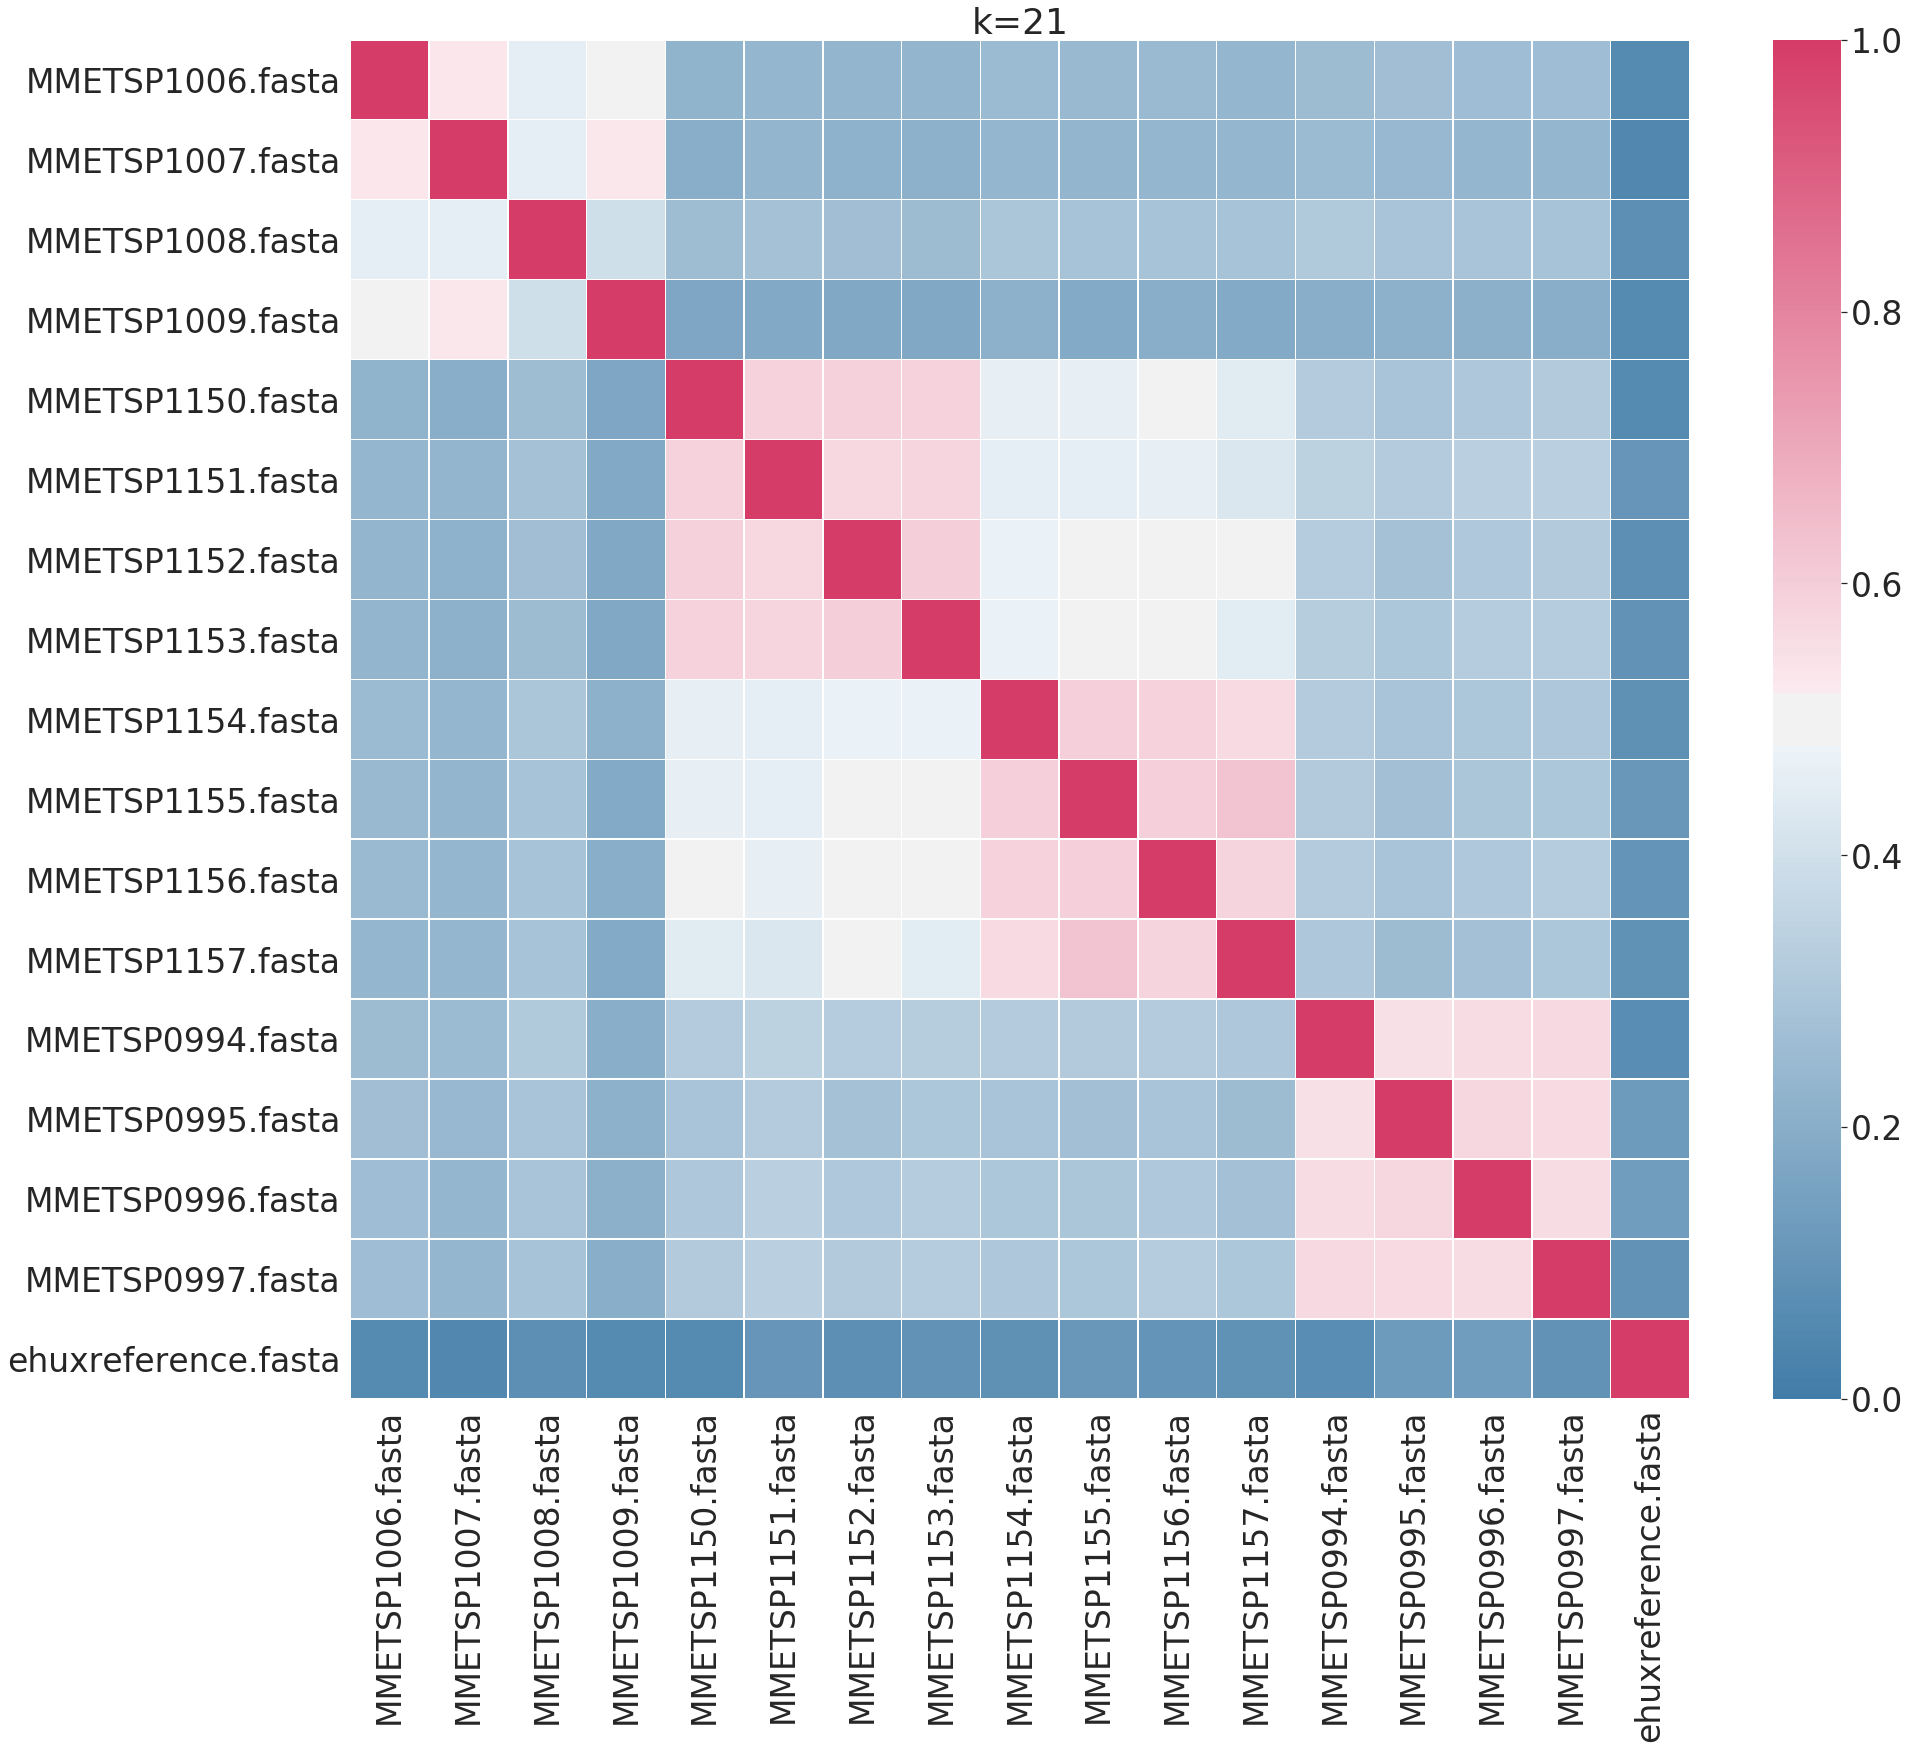

In [20]:
matrix_cmp_51_index.columns[0].split("MMETSP")[1].split(".")[0]
f, axes = plt.subplots(1, 1, figsize=(30,25), sharey=False)
sns.set(font_scale=3)
sns.heatmap(matrix_cmp_21_index, annot=False, ax = axes, linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=matrix_cmp_21_index.columns, vmin=0, vmax=1).set_title('k=21')
#plt.savefig(fname = "heatmaps_ehux_k21.pdf",transparent=True)

[997, 1152, 1153, 1151, 1154, 994, 1155, 996, 1157, 995, 1150, 1156]


Text(0.5, 1, 'k=51')

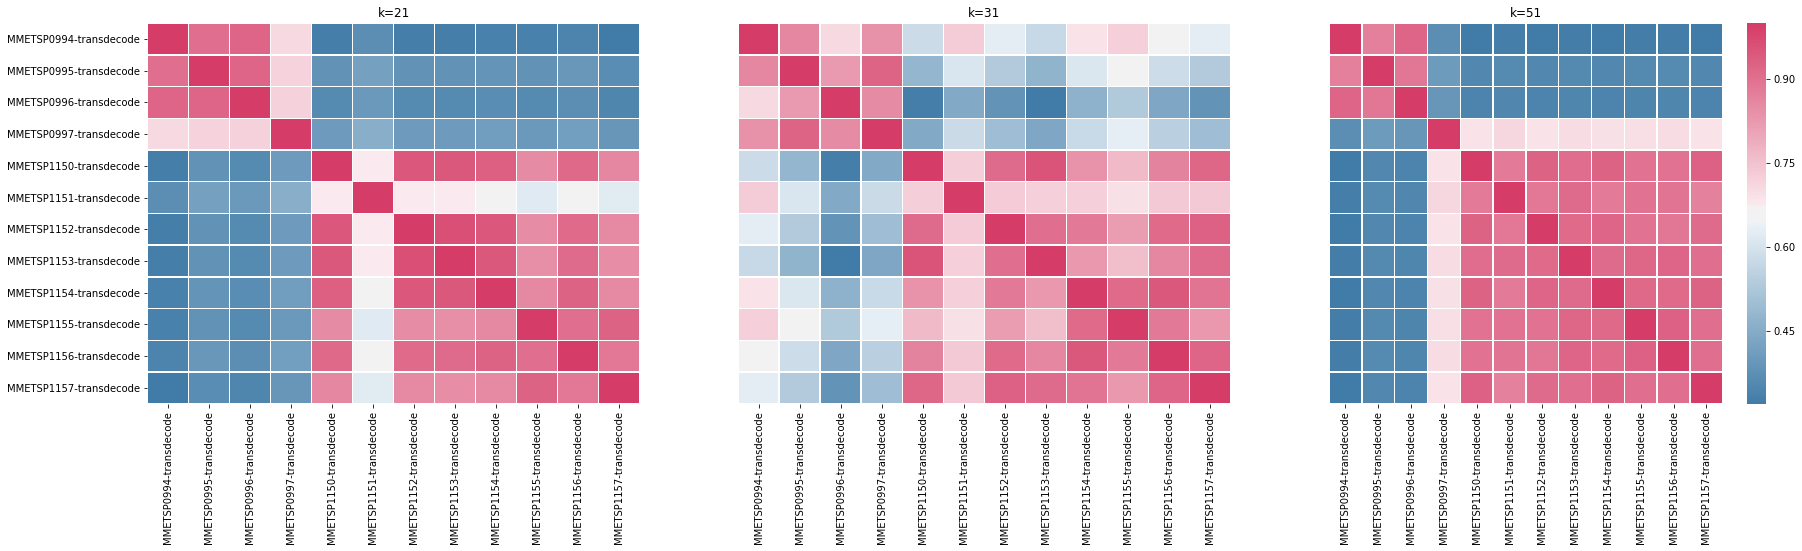

In [34]:
indices = [("MMETSP" in curr) | ("ehux" in curr) for curr in matrix_cmp_21_prot.columns]
matrix_cmp_21_index = matrix_cmp_21_prot.iloc[np.where(indices)[0],np.where(indices)[0]]

indices = [("MMETSP" in curr) | ("ehux" in curr) for curr in matrix_cmp_33_prot.columns]
matrix_cmp_31_index = matrix_cmp_33_prot.iloc[indices,indices]

indices = [("MMETSP" in curr) | ("ehux" in curr) for curr in matrix_cmp_51_prot.columns]
matrix_cmp_51_index = matrix_cmp_51_prot.iloc[indices,indices]

matrix_cmp_21_index.index = matrix_cmp_21_index.columns
matrix_cmp_31_index.index = matrix_cmp_31_index.columns
matrix_cmp_51_index.index = matrix_cmp_51_index.columns
accnums = [int(curr.split("MMETSP")[1].split("-")[0]) if "MMETSP" in curr else curr for curr in matrix_cmp_51_index.columns]
print(accnums)
types_names = [curr.split("-")[len(curr.split("-"))-1] for curr in matrix_cmp_51_index.columns]
types_names = ["nt" if "fastq" in curr else curr for curr in types_names]
summaryframe = pd.DataFrame({"FullName": matrix_cmp_21_index.columns,\
             "AccessionNumber": accnums, \
             "Type": types_names, \
             "21": matrix_cmp_21_index.mean(),\
             "31": matrix_cmp_31_index.mean(),\
             "51": matrix_cmp_51_index.mean()})

indices = np.argsort(accnums)

matrix_cmp_21_index = matrix_cmp_21_index.iloc[indices,indices]
matrix_cmp_31_index = matrix_cmp_31_index.iloc[indices,indices]
matrix_cmp_51_index = matrix_cmp_51_index.iloc[indices,indices]
#matrix_cmp_21_index.index = matrix_cmp_21_index.columns
#matrix_cmp_31_index.index = matrix_cmp_31_index.columns
#matrix_cmp_51_index.index = matrix_cmp_51_index.columns

cmap_k = sns.diverging_palette(240, 1, as_cmap=True)
# sns.color_palette("coolwarm", 7)

f, axes = plt.subplots(1, 3, figsize=(30,7), sharey=False)
sns.heatmap(matrix_cmp_21_index, annot=False, ax = axes[0], linewidths=.5,cmap = cmap_k,cbar=False,yticklabels=matrix_cmp_21_index.columns).set_title('k=21')
sns.heatmap(matrix_cmp_31_index, annot=False, ax = axes[1], linewidths=.5,cmap = cmap_k,cbar=False,yticklabels=[]).set_title('k=31')
sns.heatmap(matrix_cmp_51_index, annot=False, ax = axes[2], linewidths=.5,cmap = cmap_k,yticklabels=[]).set_title('k=51')
#plt.savefig(fname = "heatmaps_thaps_transdecoder.pdf",transparent=True)

In [35]:
matrix_cmp_21_prot.columns

Index(['MMETSP0997-transdecode', 'MMETSP1152-transdecode',
       'MMETSP1153-transdecode', 'MMETSP1151-transdecode',
       'MMETSP1154-transdecode', 'MMETSP0994-transdecode',
       'MMETSP1155-transdecode', 'MMETSP0996-transdecode',
       'MMETSP1157-transdecode', 'MMETSP0995-transdecode',
       'MMETSP1150-transdecode', 'MMETSP1156-transdecode'],
      dtype='object')

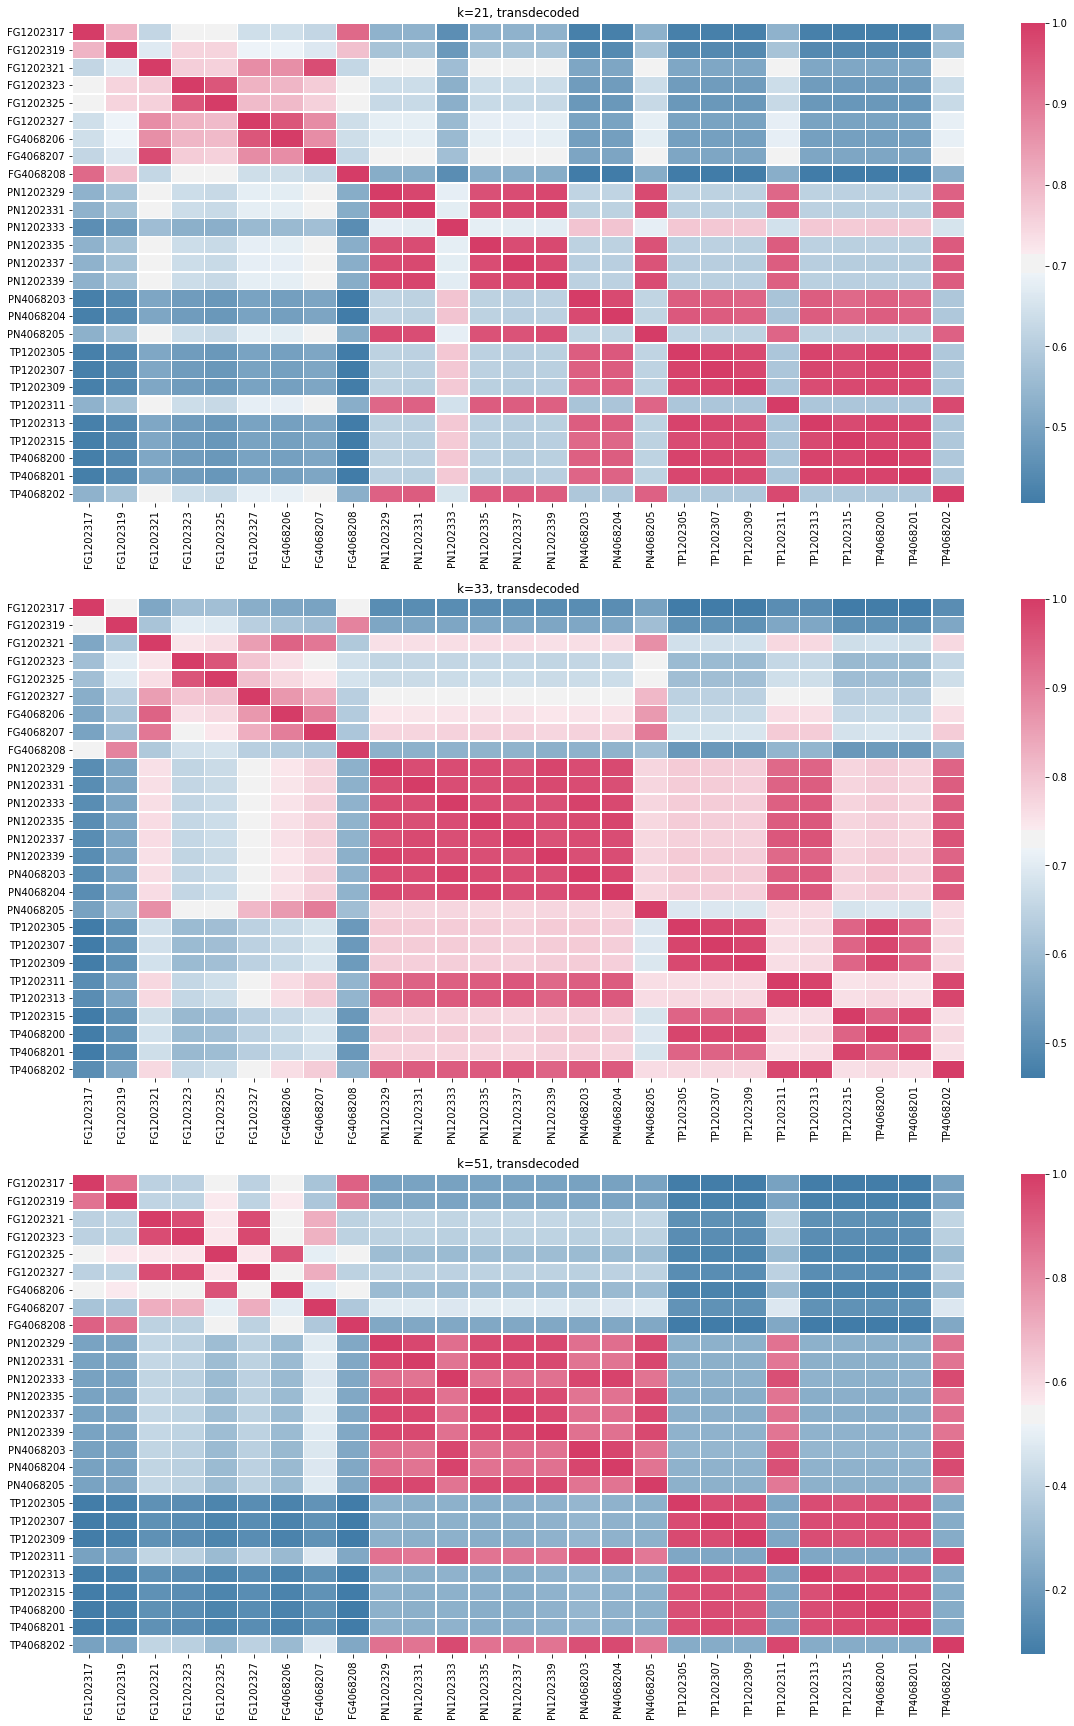

In [45]:
metadat = pd.read_csv("../data/metadata_all_ncbi.csv")
ind_metadat = [list(metadat.Run).index(curr.split("-")[0]) for curr in matrix_cmp_33_prot.columns]
namessorted = list(metadat.ShortName[ind_metadat])
accnums = [int(curr.split("SRR")[1].split("-")[0]) for curr in matrix_cmp_33_prot.columns]
indices = np.argsort(accnums)
accnumsspec = [str(namessorted[curr]) + str(matrix_cmp_33_prot.columns[curr].split("SRR")[1].split("-")[0]) for curr in range(0,len(matrix_cmp_33_prot.columns))]
indices = np.argsort(accnumsspec)

matrix_cmp_21_index = matrix_cmp_21_prot.iloc[indices,indices]
matrix_cmp_33_index = matrix_cmp_33_prot.iloc[indices,indices]
matrix_cmp_51_index = matrix_cmp_51_prot.iloc[indices,indices]

matrix_cmp_21_index.columns = matrix_cmp_21_index.index = np.sort(accnumsspec)
matrix_cmp_33_index.columns = matrix_cmp_33_index.index = np.sort(accnumsspec)
matrix_cmp_51_index.columns = matrix_cmp_51_index.index = np.sort(accnumsspec)

cmap_k = sns.diverging_palette(240, 1, as_cmap=True)

f, axes = plt.subplots(3, 1, figsize=(20,30), sharey=False)
#sns.heatmap(matrix_cmp_21_index, annot=False, ax = axes[0], linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=matrix_cmp_21_index.columns).set_title('k=21, transdecoded')
#sns.heatmap(matrix_cmp_33_index, annot=False, ax = axes[1], linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=[]).set_title('k=33, transdecoded')
#sns.heatmap(matrix_cmp_51_index, annot=False, ax = axes[2], linewidths=.5,cmap = cmap_k,yticklabels=[]).set_title('k=51, transdecoded')

sns.heatmap(matrix_cmp_21_index, annot=False, ax = axes[0], linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=matrix_cmp_21_index.columns).set_title('k=21, transdecoded')
sns.heatmap(matrix_cmp_33_index, annot=False, ax = axes[1], linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=matrix_cmp_33_index.columns).set_title('k=33, transdecoded')
sns.heatmap(matrix_cmp_51_index, annot=False, ax = axes[2], linewidths=.5,cmap = cmap_k,yticklabels=matrix_cmp_51_index.columns).set_title('k=51, transdecoded')
plt.savefig(fname = "heatmaps_transdecoder.pdf",transparent=True)


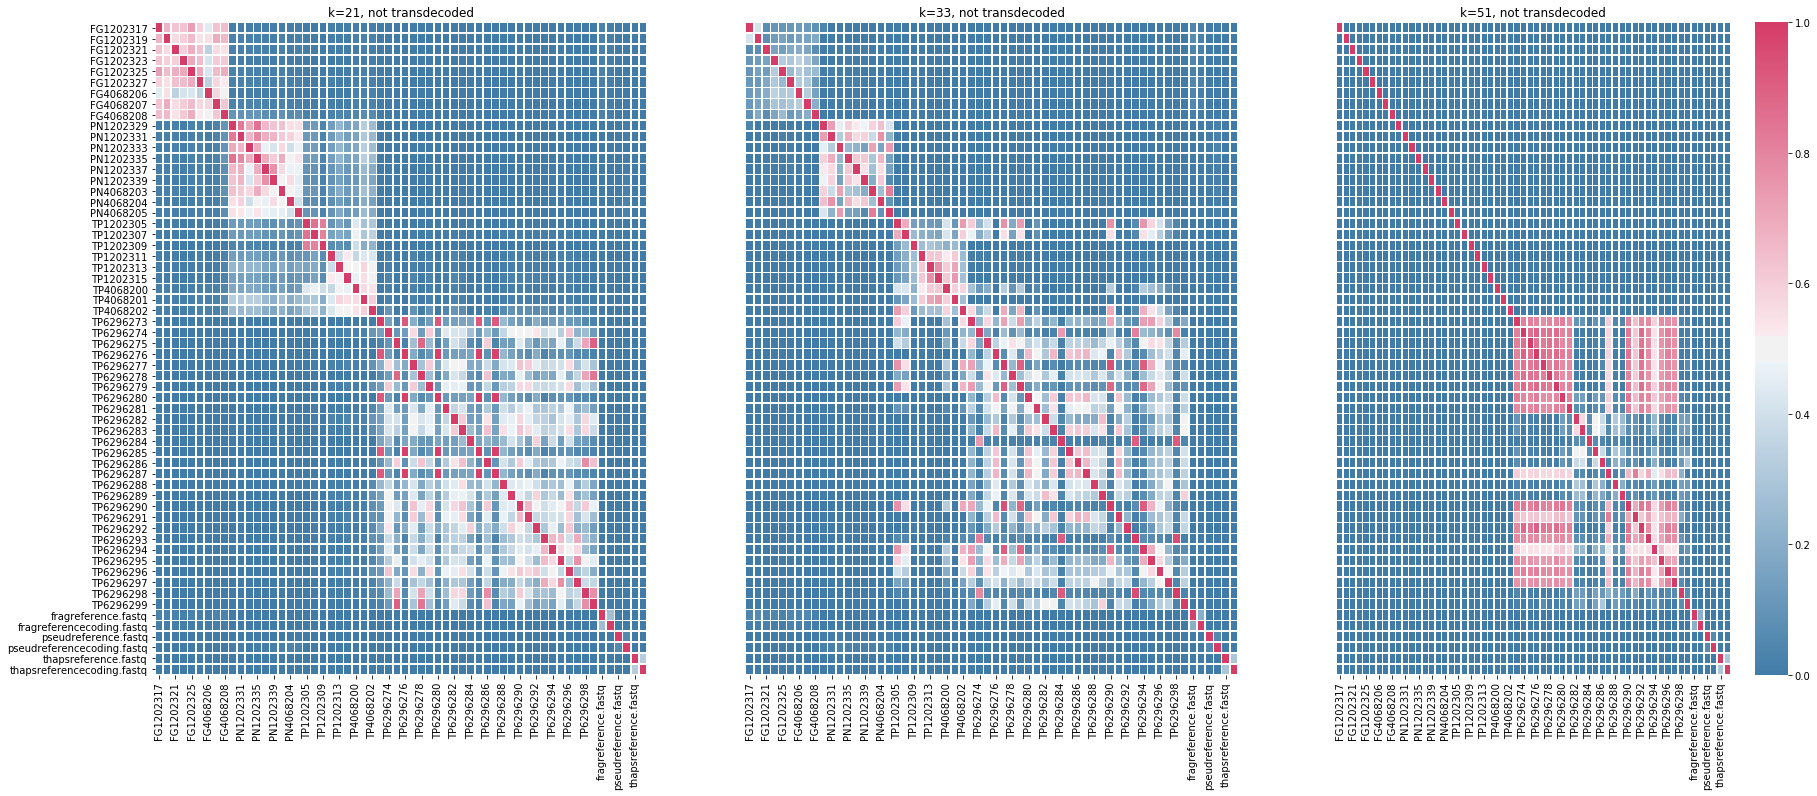

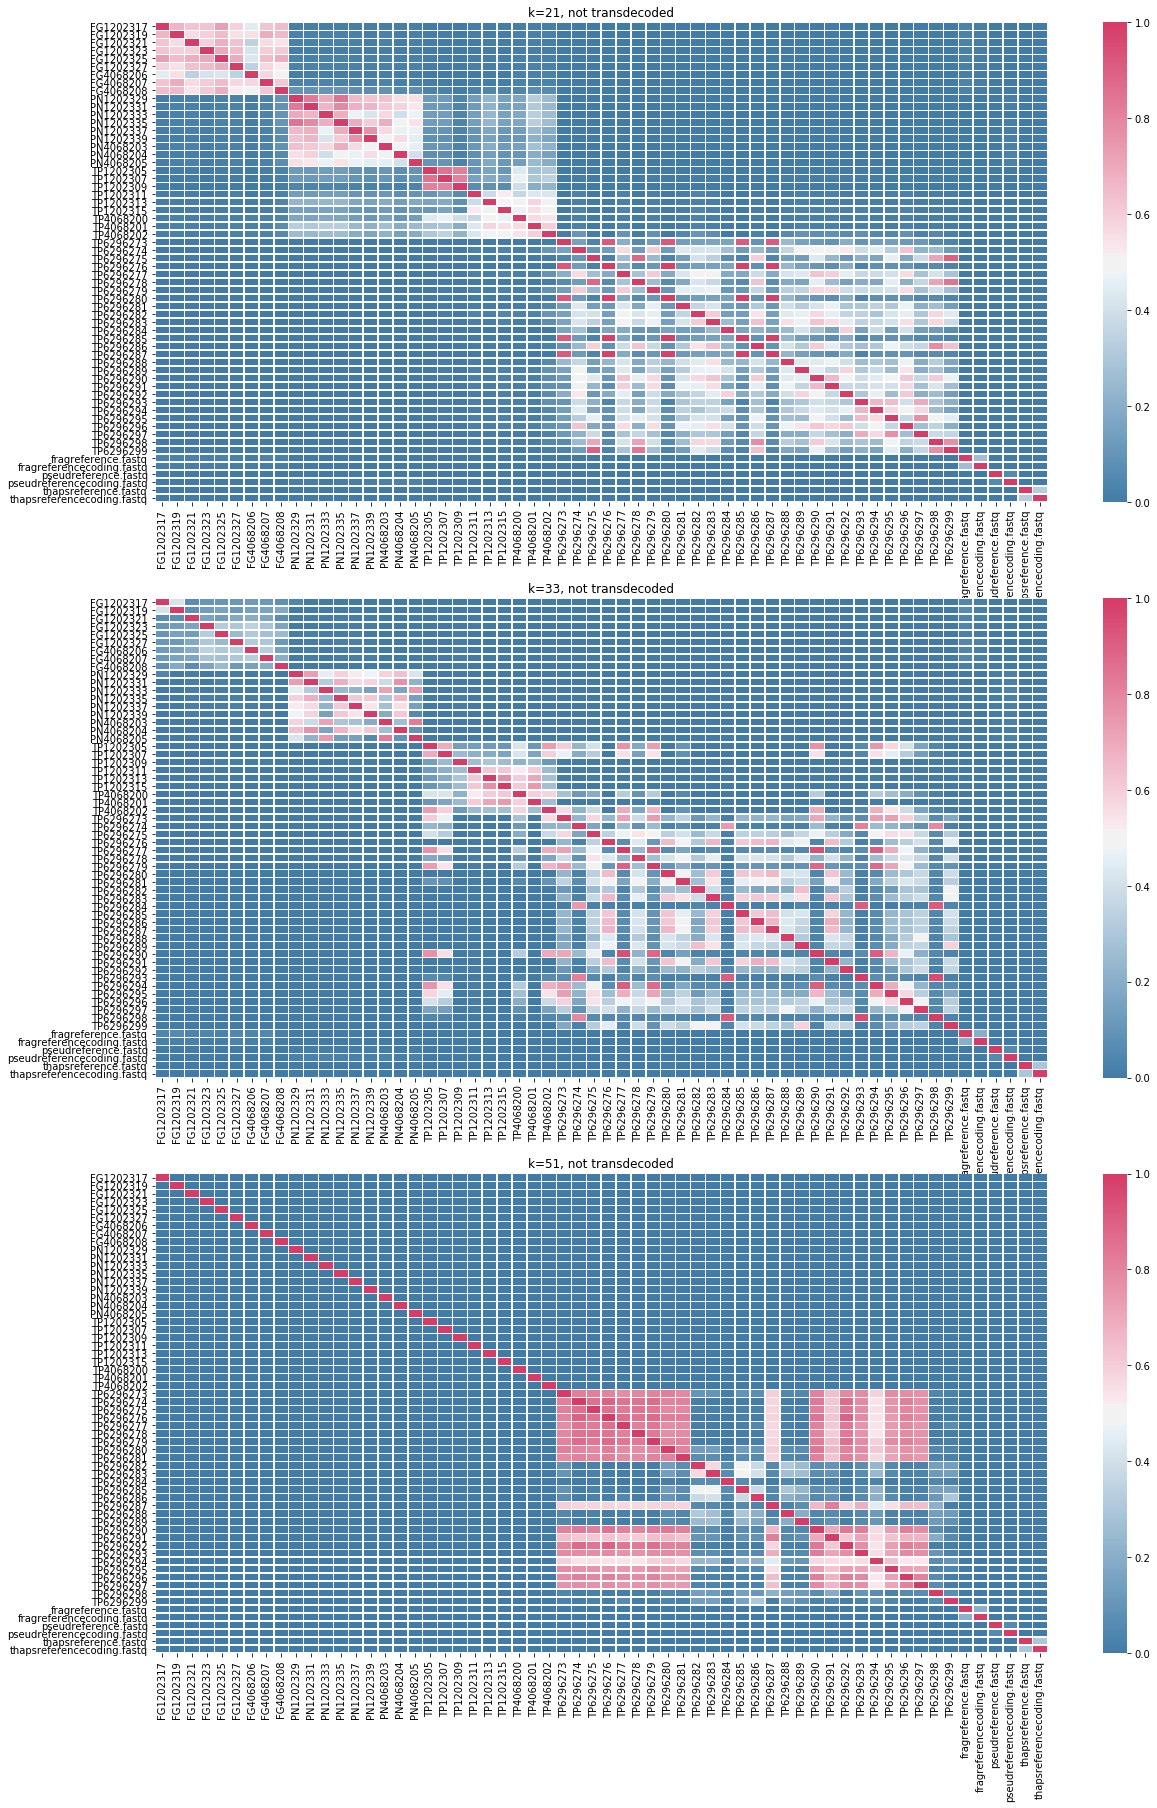

In [46]:
trinityindex = ["-" not in curr for curr in matrix_cmp_21.columns]
matrix_cmp_21_index = matrix_cmp_21.iloc[trinityindex,trinityindex]

trinityindex = ["-" not in curr for curr in matrix_cmp_33.columns]
matrix_cmp_33_index = matrix_cmp_33.iloc[trinityindex,trinityindex]

trinityindex = ["-" not in curr for curr in matrix_cmp_51.columns]
matrix_cmp_51_index = matrix_cmp_51.iloc[trinityindex,trinityindex]

metadat = pd.read_csv("../data/metadata_all_ncbi.csv")
ind_metadat = [list(metadat.Run).index(curr.split(".")[0]) if (curr.split(".")[0] in list(metadat.Run)) else 0 for curr in matrix_cmp_21_index.columns]
namessorted = list(metadat.ShortName[ind_metadat])
accnumsspec = [(str(namessorted[curr]) + str(matrix_cmp_21_index.columns[curr].split("SRR")[1].split(".")[0])) if (len(matrix_cmp_21_index.columns[curr].split("SRR")) > 1) else (matrix_cmp_21_index.columns[curr]) for curr in range(0,len(matrix_cmp_21_index.columns))]
indices = np.argsort(accnumsspec)

matrix_cmp_21_index = matrix_cmp_21_index.iloc[indices,indices]
matrix_cmp_21_index.columns = matrix_cmp_21_index.index = np.sort(accnumsspec)

metadat = pd.read_csv("../data/metadata_all_ncbi.csv")
ind_metadat = [list(metadat.Run).index(curr.split(".")[0]) if (curr.split(".")[0] in list(metadat.Run)) else 0 for curr in matrix_cmp_33_index.columns]
namessorted = list(metadat.ShortName[ind_metadat])
accnumsspec = [(str(namessorted[curr]) + str(matrix_cmp_33_index.columns[curr].split("SRR")[1].split(".")[0])) if (len(matrix_cmp_33_index.columns[curr].split("SRR")) > 1) else (matrix_cmp_33_index.columns[curr]) for curr in range(0,len(matrix_cmp_33_index.columns))]
indices = np.argsort(accnumsspec)

matrix_cmp_33_index = matrix_cmp_33_index.iloc[indices,indices]
matrix_cmp_33_index.columns = matrix_cmp_33_index.index = np.sort(accnumsspec)

metadat = pd.read_csv("../data/metadata_all_ncbi.csv")
ind_metadat = [list(metadat.Run).index(curr.split(".")[0]) if (curr.split(".")[0] in list(metadat.Run)) else 0 for curr in matrix_cmp_51_index.columns]
namessorted = list(metadat.ShortName[ind_metadat])
accnumsspec = [(str(namessorted[curr]) + str(matrix_cmp_51_index.columns[curr].split("SRR")[1].split(".")[0])) if (len(matrix_cmp_51_index.columns[curr].split("SRR")) > 1) else (matrix_cmp_51_index.columns[curr]) for curr in range(0,len(matrix_cmp_51_index.columns))]
indices = np.argsort(accnumsspec)

matrix_cmp_51_index = matrix_cmp_51_index.iloc[indices,indices]
matrix_cmp_51_index.columns = matrix_cmp_51_index.index = np.sort(accnumsspec)

cmap_k = sns.diverging_palette(240, 1, as_cmap=True)

f, axes = plt.subplots(1, 3, figsize=(30,12), sharey=False)
sns.heatmap(matrix_cmp_21_index, annot=False, ax = axes[0], linewidths=.5,cmap = cmap_k,cbar=False,yticklabels=matrix_cmp_21_index.columns).set_title('k=21, not transdecoded')
sns.heatmap(matrix_cmp_33_index, annot=False, ax = axes[1], linewidths=.5,cmap = cmap_k,cbar=False,yticklabels=[]).set_title('k=33, not transdecoded')
sns.heatmap(matrix_cmp_51_index, annot=False, ax = axes[2], linewidths=.5,cmap = cmap_k,yticklabels=[]).set_title('k=51, not transdecoded')


f, axes = plt.subplots(3, 1, figsize=(20,30), sharey=False)

sns.heatmap(matrix_cmp_21_index, annot=False, ax = axes[0], linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=matrix_cmp_21_index.columns).set_title('k=21, not transdecoded')
sns.heatmap(matrix_cmp_33_index, annot=False, ax = axes[1], linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=matrix_cmp_33_index.columns).set_title('k=33, not transdecoded')
sns.heatmap(matrix_cmp_51_index, annot=False, ax = axes[2], linewidths=.5,cmap = cmap_k,yticklabels=matrix_cmp_51_index.columns).set_title('k=51, not transdecoded')
plt.savefig(fname = "heatmaps_notassembled.pdf",transparent=True)



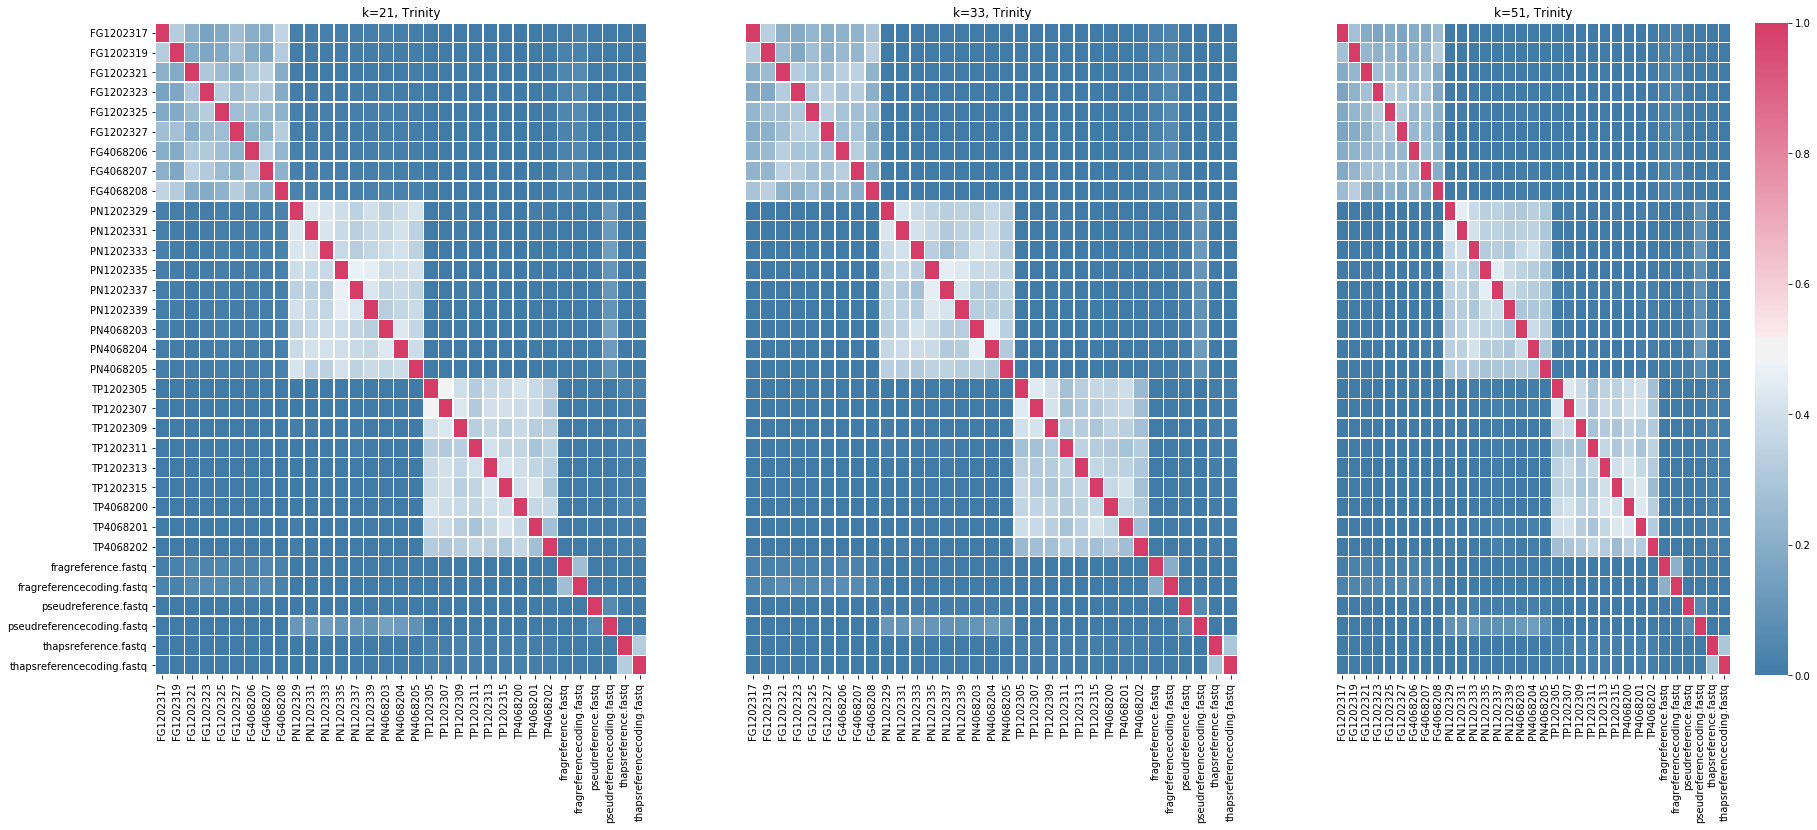

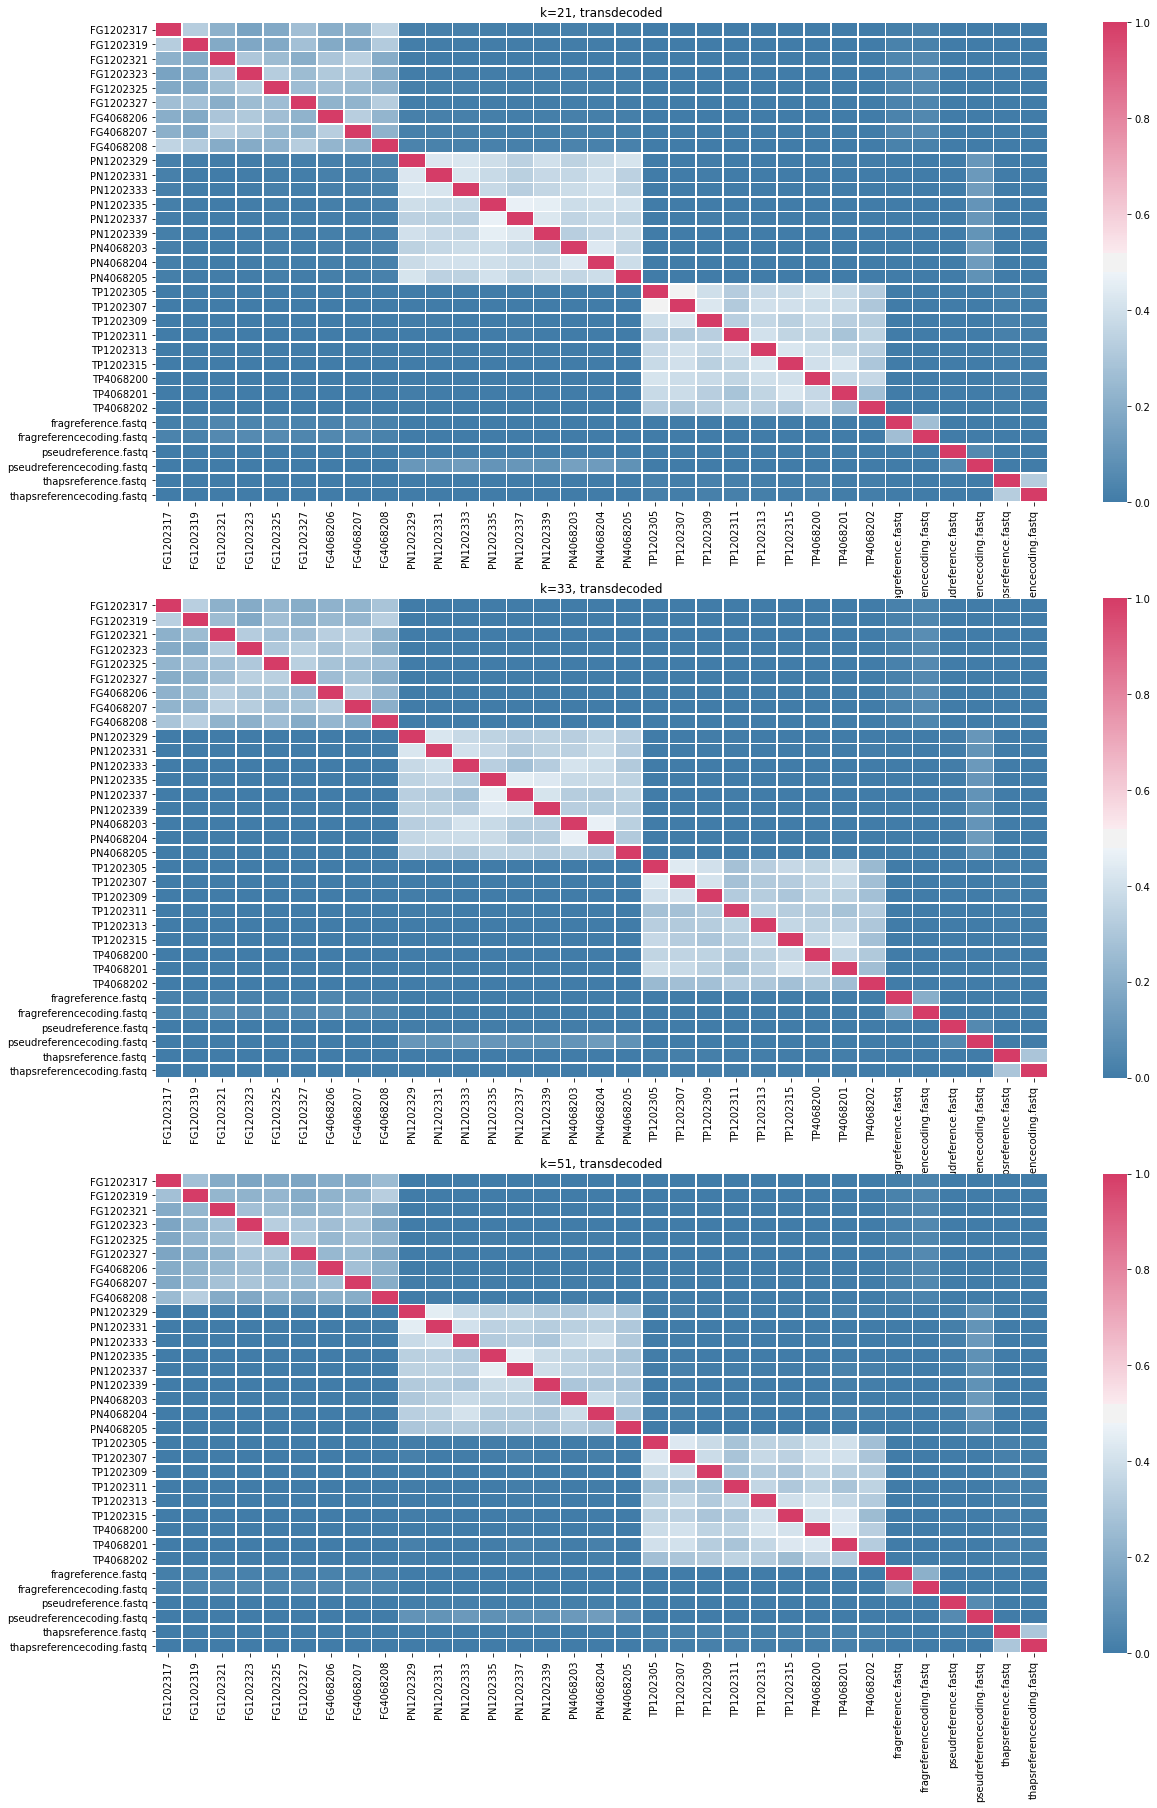

In [43]:
trinityindex = [("trinity" in curr) | ("reference" in curr) for curr in matrix_cmp_21.columns]
matrix_cmp_21_index = matrix_cmp_21.iloc[trinityindex,trinityindex]

trinityindex = [("trinity" in curr) | ("reference" in curr) for curr in matrix_cmp_33.columns]
matrix_cmp_33_index = matrix_cmp_33.iloc[trinityindex,trinityindex]

trinityindex = [("trinity" in curr) | ("reference" in curr) for curr in matrix_cmp_51.columns]
matrix_cmp_51_index = matrix_cmp_51.iloc[trinityindex,trinityindex]

metadat = pd.read_csv("../data/metadata_all_ncbi.csv")
ind_metadat = [list(metadat.Run).index(curr.split(".")[0]) if (curr.split(".")[0] in list(metadat.Run)) else 0 for curr in matrix_cmp_21_index.columns]
namessorted = list(metadat.ShortName[ind_metadat])
accnumsspec = [(str(namessorted[curr]) + str(matrix_cmp_21_index.columns[curr].split("SRR")[1].split(".")[0])) if (len(matrix_cmp_21_index.columns[curr].split("SRR")) > 1) else (matrix_cmp_21_index.columns[curr]) for curr in range(0,len(matrix_cmp_21_index.columns))]
indices = np.argsort(accnumsspec)

matrix_cmp_21_index = matrix_cmp_21_index.iloc[indices,indices]
matrix_cmp_21_index.columns = matrix_cmp_21_index.index = np.sort(accnumsspec)

metadat = pd.read_csv("../data/metadata_all_ncbi.csv")
ind_metadat = [list(metadat.Run).index(curr.split(".")[0]) if (curr.split(".")[0] in list(metadat.Run)) else 0 for curr in matrix_cmp_33_index.columns]
namessorted = list(metadat.ShortName[ind_metadat])
accnumsspec = [(str(namessorted[curr]) + str(matrix_cmp_33_index.columns[curr].split("SRR")[1].split(".")[0])) if (len(matrix_cmp_33_index.columns[curr].split("SRR")) > 1) else (matrix_cmp_33_index.columns[curr]) for curr in range(0,len(matrix_cmp_33_index.columns))]
indices = np.argsort(accnumsspec)

matrix_cmp_33_index = matrix_cmp_33_index.iloc[indices,indices]
matrix_cmp_33_index.columns = matrix_cmp_33_index.index = np.sort(accnumsspec)

metadat = pd.read_csv("../data/metadata_all_ncbi.csv")
ind_metadat = [list(metadat.Run).index(curr.split(".")[0]) if (curr.split(".")[0] in list(metadat.Run)) else 0 for curr in matrix_cmp_51_index.columns]
namessorted = list(metadat.ShortName[ind_metadat])
accnumsspec = [(str(namessorted[curr]) + str(matrix_cmp_51_index.columns[curr].split("SRR")[1].split(".")[0])) if (len(matrix_cmp_51_index.columns[curr].split("SRR")) > 1) else (matrix_cmp_51_index.columns[curr]) for curr in range(0,len(matrix_cmp_51_index.columns))]
indices = np.argsort(accnumsspec)

matrix_cmp_51_index = matrix_cmp_51_index.iloc[indices,indices]
matrix_cmp_51_index.columns = matrix_cmp_51_index.index = np.sort(accnumsspec)

cmap_k = sns.diverging_palette(240, 1, as_cmap=True)

f, axes = plt.subplots(1, 3, figsize=(30,12), sharey=False)
sns.heatmap(matrix_cmp_21_index, annot=False, ax = axes[0], linewidths=.5,cmap = cmap_k,cbar=False,yticklabels=matrix_cmp_21_index.columns).set_title('k=21, Trinity')
sns.heatmap(matrix_cmp_33_index, annot=False, ax = axes[1], linewidths=.5,cmap = cmap_k,cbar=False,yticklabels=[]).set_title('k=33, Trinity')
sns.heatmap(matrix_cmp_51_index, annot=False, ax = axes[2], linewidths=.5,cmap = cmap_k,yticklabels=[]).set_title('k=51, Trinity')


f, axes = plt.subplots(3, 1, figsize=(20,30), sharey=False)

sns.heatmap(matrix_cmp_21_index, annot=False, ax = axes[0], linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=matrix_cmp_21_index.columns).set_title('k=21, transdecoded')
sns.heatmap(matrix_cmp_33_index, annot=False, ax = axes[1], linewidths=.5,cmap = cmap_k,cbar=True,yticklabels=matrix_cmp_33_index.columns).set_title('k=33, transdecoded')
sns.heatmap(matrix_cmp_51_index, annot=False, ax = axes[2], linewidths=.5,cmap = cmap_k,yticklabels=matrix_cmp_51_index.columns).set_title('k=51, transdecoded')
plt.savefig(fname = "heatmaps_assembled.pdf",transparent=True)

In [ ]:
accnums = [int(curr.split("SRR")[1].split("-")[0]) for curr in matrix_cmp_51_index.columns]
accnumsrows = [int(curr.split("SRR")[1].split("-")[0]) for curr in matrix_cmp_51_index.columns]

summaryframe = pd.DataFrame({"FullName": list(matrix_cmp_33_index.columns) * len(matrix_cmp_33_index.columns),\
             "AccessionNumber1": accnums * len(matrix_cmp_33_index.columns), \
             "AccessionNumber2": np.repeat(accnums, len(matrix_cmp_33_index.columns), axis=0), \
             "21": matrix_cmp_21_index.values.flatten().tolist(),\
             "33": matrix_cmp_33_index.values.flatten().tolist(),\
             "51": matrix_cmp_51_index.values.flatten().tolist()})
summary_plot = summaryframe.melt(id_vars = ["FullName","AccessionNumber1","AccessionNumber2"],\
                 var_name = "k",\
                 value_name = "SourmashScore").sort_values(by = ["AccessionNumber1","k"], axis = 0)
print(summary_plot)
summary_plot['Group'] = summary_plot.AccessionNumber1.astype(int)

f, ax = plt.subplots(1, 1, figsize=(15,7), sharey=False)
sns.lineplot(x='AccessionNumber1', 
             y='AccessionNumber2',
             hue='SourmashScore', 
             style="k",
             size = "SourmashScore",
             ax = ax,
             markers=True,
             estimator=None,
             #palette=['b','r'],
             data=summary_plot)

                    FullName  AccessionNumber1  AccessionNumber2   k  \
0     SRR1202305-transdecode           1202305           1202305  21   
27    SRR1202305-transdecode           1202305           1202307  21   
54    SRR1202305-transdecode           1202305           1202309  21   
81    SRR1202305-transdecode           1202305           1202311  21   
108   SRR1202305-transdecode           1202305           1202313  21   
135   SRR1202305-transdecode           1202305           1202315  21   
162   SRR1202305-transdecode           1202305           1202317  21   
189   SRR1202305-transdecode           1202305           1202319  21   
216   SRR1202305-transdecode           1202305           1202321  21   
243   SRR1202305-transdecode           1202305           1202323  21   
270   SRR1202305-transdecode           1202305           1202325  21   
297   SRR1202305-transdecode           1202305           1202327  21   
324   SRR1202305-transdecode           1202305           1202329

In [38]:
matrix_cmp_51_index

,SRR1202313.fasta-backtrans,SRR1202329.fasta-backtrans,SRR4068207.fasta-backtrans,SRR1202317.fasta-backtrans,SRR1202333.fasta-backtrans,SRR4068204.fasta-backtrans,SRR1202311.fasta-backtrans,SRR4068206.fasta-backtrans,SRR4068208.fasta-backtrans,SRR1202307.fasta-backtrans,SRR4068203.fasta-backtrans,SRR1202331.fasta-backtrans,SRR1202325.fasta-backtrans,SRR1202319.fasta-backtrans,SRR1202335.fasta-backtrans,SRR1202323.fasta-backtrans,SRR1202327.fasta-backtrans,SRR1202309.fasta-backtrans,SRR4068205.fasta-backtrans,SRR1202337.fasta-backtrans,SRR4068202.fasta-backtrans,SRR1202321.fasta-backtrans,SRR1202339.fasta-backtrans,SRR4068200.fasta-backtrans,SRR4068201.fasta-backtrans,SRR1202305.fasta-backtrans,SRR1202315.fasta-backtrans
SRR1202313.fasta-backtrans,1.000000,0.000488,0.000000,0.000000,0.000510,0.000000,0.345167,0.000000,0.000000,0.309893,0.000000,0.000000,0.000000,0.000000,0.001635,0.000000,0.000000,0.247853,0.001029,0.000516,0.241715,0.000000,0.000000,0.357214,0.326766,0.311255,0.378959
SRR1202329.fasta-backtrans,0.000488,1.000000,0.000000,0.000000,0.335249,0.274957,0.000000,0.000000,0.000000,0.000515,0.283841,0.401742,0.000000,0.000000,0.275522,0.000000,0.000000,0.000000,0.301797,0.266752,0.000000,0.000000,0.288583,0.000000,0.000000,0.000000,0.000000
SRR4068207.fasta-backtrans,0.000000,0.000000,1.000000,0.153092,0.002088,0.004350,0.000000,0.219179,0.156212,0.000000,0.004301,0.004168,0.216013,0.173396,0.004460,0.209114,0.247430,0.000000,0.000000,0.000000,0.000000,0.233849,0.000000,0.000000,0.000000,0.000000,0.000000
SRR1202317.fasta-backtrans,0.000000,0.000000,0.153092,1.000000,0.000525,0.001094,0.000000,0.159507,0.268729,0.000000,0.001082,0.001048,0.164403,0.297273,0.001122,0.128091,0.113663,0.000000,0.000000,0.000000,0.000000,0.182957,0.000000,0.000000,0.000000,0.000000,0.000000
SRR1202333.fasta-backtrans,0.000510,0.335249,0.002088,0.000525,1.000000,0.330823,0.000000,0.001131,0.001020,0.000538,0.354725,0.399098,0.001611,0.000995,0.286141,0.001004,0.000528,0.000000,0.327497,0.256325,0.000000,0.000546,0.277831,0.000000,0.000000,0.000000,0.000000
SRR4068204.fasta-backtrans,0.000000,0.274957,0.004350,0.001094,0.330823,1.000000,0.002322,0.002355,0.002125,0.000000,0.374916,0.319979,0.003356,0.002072,0.276347,0.002092,0.001100,0.000000,0.300890,0.283898,0.002174,0.001136,0.267845,0.000000,0.000000,0.000000,0.000000
SRR1202311.fasta-backtrans,0.345167,0.000000,0.000000,0.000000,0.000000,0.002322,1.000000,0.000000,0.000000,0.260057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.247048,0.001124,0.002253,0.269375,0.000000,0.001156,0.311299,0.246296,0.270214,0.287619
SRR4068206.fasta-backtrans,0.000000,0.000000,0.219179,0.159507,0.001131,0.002355,0.000000,1.000000,0.144693,0.000000,0.002328,0.002256,0.194204,0.193202,0.002415,0.219437,0.196148,0.000000,0.000000,0.000000,0.000000,0.211956,0.000000,0.000000,0.000000,0.000000,0.000000
SRR4068208.fasta-backtrans,0.000000,0.000000,0.156212,0.268729,0.001020,0.002125,0.000000,0.144693,1.000000,0.000000,0.002101,0.002036,0.168641,0.251824,0.002179,0.134965,0.124981,0.000000,0.000000,0.000000,0.000000,0.129209,0.000000,0.000000,0.000000,0.000000,0.000000
SRR1202307.fasta-backtrans,0.309893,0.000515,0.000000,0.000000,0.000538,0.000000,0.260057,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.001724,0.000000,0.000000,0.367354,0.001085,0.000544,0.240678,0.000000,0.000000,0.345511,0.319319,0.401557,0.279629


In [29]:
matrix_cmp_21_index = matrix_cmp_21.iloc[transcriptomeindex,transcriptomeindex]
matrix_cmp_31_index = matrix_cmp_33.iloc[transcriptomeindex,transcriptomeindex]
matrix_cmp_51_index = matrix_cmp_51.iloc[transcriptomeindex,transcriptomeindex]

accnums = [int(curr.split("SRR")[1].split(".")[0]) for curr in matrix_cmp_51_index.columns]
types_names = [curr.split("-")[len(curr.split("-"))-1] for curr in matrix_cmp_51_index.columns]
types_names = ["nt" if "fastq" in curr else curr for curr in types_names]
summaryframe = pd.DataFrame({"FullName": matrix_cmp_21_index.columns,\
             "AccessionNumber": accnums, \
             "Type": types_names, \
             "21": matrix_cmp_21_index.mean(),\
             "31": matrix_cmp_31_index.mean(),\
             "51": matrix_cmp_51_index.mean()})
summaryframe_sorted = summaryframe.melt(id_vars = ["FullName","AccessionNumber","Type"],\
                 var_name = "k",\
                 value_name = "SourmashScore").sort_values(by = ["AccessionNumber","k"], axis = 0)
summaryframe_sorted

IndexError: positional indexers are out-of-bounds

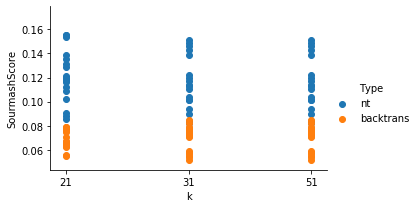

In [14]:
#summaryframe_sorted.plot(x = "k", y = "SourmashScore", c = "Type", kind = "line")

fg = sns.FacetGrid(data=summaryframe_sorted, hue='Type', aspect=1.61)
fg.map(plt.scatter, 'k', 'SourmashScore').add_legend()

In [26]:
%matplotlib inline

summaryframe_sorted["k"] = [int(curr) for curr in summaryframe_sorted["k"]]
#summaryframe_sorted.groupby(["AccessionNumber"]).plot.scatter(x ="k",y="SourmashScore",c="Type")
#fig, ax = plt.subplots(figsize=(15,7))
#summaryframe_sorted.groupby(['k','AccessionNumber',"Type"]).mean()['SourmashScore'].unstack().plot(ax=ax)
ntframe = summaryframe_sorted.loc[summaryframe_sorted["Type"] == "nt",].groupby(['k','AccessionNumber']).mean()['SourmashScore'].unstack()
backtransframe = summaryframe_sorted.loc[summaryframe_sorted["Type"] == "backtrans",].groupby(['k','AccessionNumber']).mean()['SourmashScore'].unstack()

#ntframe.plot(ax = ax)
sns.set()
#cmap="YlGnBu", 
f, axes = plt.subplots(1, 2, figsize=(20,7), sharey=False)
sns.heatmap(ntframe.transpose(), annot=True, ax = axes[0], linewidths=.5,cmap = sns.color_palette("coolwarm", 7)).set_title('NT files')
sns.heatmap(backtransframe.transpose(), annot=True, ax = axes[1], linewidths=.5,cmap = sns.color_palette("coolwarm", 7)).set_title('Protein annotations')


NameError: name 'summaryframe_sorted' is not defined

In [19]:
#indices = np.argsort(accnums)
#indices
plt.clf()
matplt.__version__

'3.1.0'

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

summaryframe_sorted["k"] = [int(curr) for curr in summaryframe_sorted["k"]]
#summaryframe_sorted.groupby(["AccessionNumber"]).plot.scatter(x ="k",y="SourmashScore",c="Type")
#fig, ax = plt.subplots(figsize=(15,7))
#summaryframe_sorted.groupby(['k','AccessionNumber',"Type"]).mean()['SourmashScore'].unstack().plot(ax=ax)
ntframe = summaryframe_sorted.loc[summaryframe_sorted["Type"] == "nt",].groupby(['k','AccessionNumber']).mean()['SourmashScore'].unstack()
backtransframe = summaryframe_sorted.loc[summaryframe_sorted["Type"] == "nt",].groupby(['k','AccessionNumber']).mean()['SourmashScore'].unstack()